In [ ]:
pip install pmdarima

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('MaunaLoaDailyTemps.csv')
df.head()


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [3]:
df=df.dropna()

In [4]:
df.isna().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [5]:
df['DATE']=pd.to_datetime(df['DATE'])

In [6]:
df['DATE']

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
1820   2018-12-26
1821   2018-12-27
1822   2018-12-28
1823   2018-12-29
1824   2018-12-30
Name: DATE, Length: 1821, dtype: datetime64[ns]

In [7]:
df.set_index('DATE',inplace=True)

In [8]:
df.head(20)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
2014-01-06,22.0,39.0,31.0,658,1759
2014-01-07,28.0,45.0,37.0,658,1759
2014-01-08,30.0,41.0,36.0,659,1800
2014-01-09,29.0,42.0,36.0,659,1801


<AxesSubplot:xlabel='DATE'>

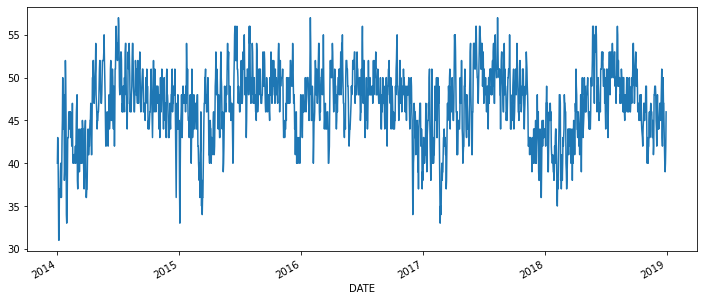

In [9]:

df['AvgTemp'].plot(figsize=(12,5))

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,data is non-stationary ")

In [11]:
adf_test(df['AvgTemp'])

ADF Statistics: -6.55468012506878
p- value: 8.67593748019951e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


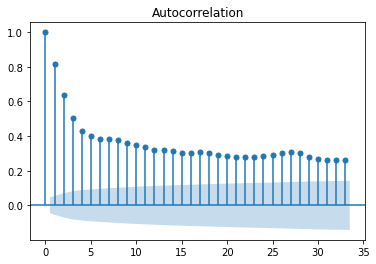

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf = plot_acf(df["AvgTemp"])

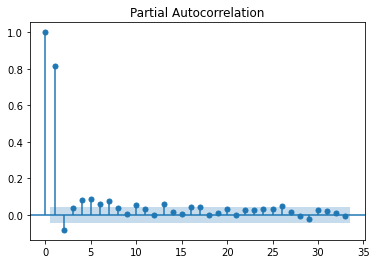

In [13]:
pacf=plot_pacf(df["AvgTemp"])

In [14]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [15]:
stepwise_fit = auto_arima(df['AvgTemp'], suppress_warnings=True)           



In [16]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.602
Date:                Mon, 02 May 2022   AIC                           8295.204
Time:                        04:19:54   BIC                           8339.261
Sample:                             0   HQIC                          8311.457
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2877      0.385      3.343      0.001       0.533       2.043
ar.L1          0.9723      0.008    117.243      0.000       0.956       0.989
ma.L1         -0.1199      0.024     -4.988      0.000      -0.167      -0.073
ma.L2         -0.2165      0.024     -8.869      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.445      0.000      -0.251      -0.157
ma.L4         -0.1334      0.023     -5.811      0.000      -0.178      -0.088
ma.L5         -0.0482      0.025     -1.964      0.050      -0.096      -0.000
sigma2         5.5376      0.175     31.713      0.000       5.195       5.880
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


(1821, 5)
(1791, 5) (30, 5)


In [18]:
print(test.iloc[0],test.iloc[-1])

MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [19]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Mon, 02 May 2022   AIC                           8292.261
Time:                        04:19:56   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.003      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

In [20]:
start=len(train)
end=len(train)+len(test)-1

start,end

(1791, 1820)

<AxesSubplot:xlabel='DATE'>

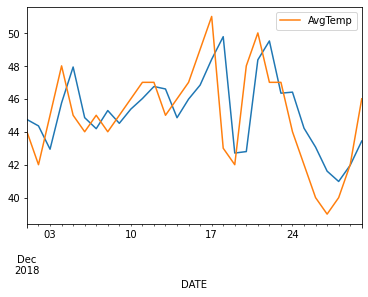

In [21]:
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.index=df.index[start:end+1]
pred.plot()
test['AvgTemp'].plot(legend=True)
